In [8]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import csv

## Functions to get parsed data out of CSV:

In [3]:
def read_in_relevant_data(parent_file_path, treatment_number):
    '''Function which takes the relevant data out of the CSV file for a certain treatment's statistics'''
    
    file_path = parent_file_path + str(treatment_number) + ".csv"
    df = pd.read_csv(file_path) #read in as pandas data frame
	
    audio_ellen = {
		'packetLoss': df['RIA_fractionLost_ellen'].tolist(),
		'bitRate': df['IT01A_bytesReceived_in_bits/s_ellen'].tolist(),
		'roundTripTime': df['RIA_roundTripTime_ellen'].tolist(),
		'bufferDelay': df['IT01A_jitterBufferDelay/emissions_ellen'].tolist(),
		'fec': df['IT01A_(dtx, fec)_ellen'].tolist(),
		'dtx': df['IT01A_(dtx, fec)_ellen'].tolist()}
    video_ellen = {
		'packetLoss': df['RIV_fractionLost_ellen'].tolist(),
		'bitRate': df['IT01V_bytesReceived_in_bits/s_ellen'].tolist(),
		'roundTripTime': df['RIV_roundTripTime_ellen'].tolist(), 
		'bufferDelay': df['IT01V_jitterBufferDelay/emissions_ellen'].tolist(),
		'codec': df['IT01V_codec_ellen'].tolist(),
		'width': df['IT01V_frameWidth_ellen'].tolist(),
		'expectedWidth': df['SV2_width_ellen'].tolist(),
		'height': df['IT01V_frameHeight_ellen'].tolist(),
		'expectedHeight': df['SV2_height_ellen'].tolist(),
		'frameRate': df['IT01V_framesPerSecond_ellen'].tolist(),
		'expectedFrameRate': df['SV2_framesPerSecond_ellen'].tolist()}
    audio_aadya = {
		'packetLoss': df['RIA_fractionLost_aadya'].tolist(),
		'bitRate': df['IT01A_bytesReceived_in_bits/s_aadya'].tolist(),
		'roundTripTime': df['RIA_roundTripTime_aadya'].tolist(),
		'bufferDelay': df['IT01A_jitterBufferDelay/emissions_aadya'].tolist(),
		'fec': df['IT01A_(dtx, fec)_aadya'].tolist(),
		'dtx': df['IT01A_(dtx, fec)_aadya'].tolist()}
    video_aadya = {
		'packetLoss': df['RIV_fractionLost_aadya'].tolist(),
		'bitRate': df['IT01V_bytesReceived_in_bits/s_aadya'].tolist(),
		'roundTripTime': df['RIV_roundTripTime_aadya'].tolist(), 
		'bufferDelay': df['IT01V_jitterBufferDelay/emissions_aadya'].tolist(),
		'codec': df['IT01V_codec_aadya'].tolist(),
		'width': df['IT01V_frameWidth_aadya'].tolist(),
		'expectedWidth': df['SV2_width_aadya'].tolist(),
		'height': df['IT01V_frameHeight_aadya'].tolist(),
		'expectedHeight': df['SV2_height_aadya'].tolist(),
		'frameRate': df['IT01V_framesPerSecond_aadya'].tolist(),
		'expectedFrameRate': df['SV2_framesPerSecond_aadya'].tolist()}
	
    return audio_ellen, video_ellen, audio_aadya, video_aadya


def graph_crossover(audio_ellen, video_ellen, audio_aadya, video_aadya):
	'''function to graph the times the each statistic has/doesn't have data for'''

	plt.figure(figsize=(13, 9))
	plot1 = plt.subplot2grid((9, 13), (0, 0), rowspan=9, colspan=6)
	plot2 = plt.subplot2grid((9, 13), (0, 7), rowspan=9, colspan=6)
	
	colours = ["forestgreen", "lime", "mediumseagreen", "aquamarine", "turquoise", "lightseagreen", "mediumturquoise","paleturquoise", "darkslategray", "teal", "darkcyan", "c", "cyan", "darkturquoise", "cadetblue", "powderblue", "lightblue"]
	col = 0
	y_translation = 0
	
	for key, val in audio_ellen.items():
		temp_vals = []
		for i in range(len(val)):
			if val[i] == -1 or val[i] == "-1":
				temp_vals.append(y_translation)
			else:
				temp_vals.append(y_translation + 4)
		plot1.plot(range(len(temp_vals)), temp_vals, label=key, color=colours[col])
		col += 1
		y_translation += 5

	for key, val in video_ellen.items():
		temp_vals = []
		for i in range(len(val)):
			if val[i] == -1 or val[i] == "-1":
				temp_vals.append(y_translation)
			else:
				temp_vals.append(y_translation + 4)
		plot1.plot(range(len(temp_vals)), temp_vals, label=key, color=colours[col])
		col += 1
		y_translation += 5

	col = 0
	y_translation = 0
	
	for key, val in audio_aadya.items():
		temp_vals = []
		for i in range(len(val)):
			if val[i] == -1 or val[i] == "-1":
				temp_vals.append(y_translation)
			else:
				temp_vals.append(y_translation + 4)
		plot2.plot(range(len(temp_vals)), temp_vals, label=key, color=colours[col])
		col += 1
		y_translation += 5

	for key, val in video_aadya.items():
		temp_vals = []
		for i in range(len(val)):
			if val[i] == -1 or val[i] == "-1":
				temp_vals.append(y_translation)
			else:
				temp_vals.append(y_translation + 4)
		plot2.plot(range(len(temp_vals)), temp_vals, label=key, color=colours[col])
		col += 1
		y_translation += 5
	
	plot1.legend()
	plot2.legend()
	plot1.set_title("Ellen's side")
	plot2.set_title("Aadya's side")
	plot1.set_yticklabels([])
	plot2.set_yticklabels([])
	plot1.set_xlabel("Seconds")
	plot2.set_xlabel("Seconds")
	plt.show()


def find_non_null_timestamps(stats_dict):
	'''Function to find the roughly 30 second range of timestamps which Web RTC consistently provides data for.'''

	global_leftmost = -1
	global_rightmost = 99999999999
	for key, val in stats_dict.items():
		leftmost = None
		rightmost = None
		for i in range(len(val)):
			if val[i] != -1 and val[i] != "-1":
				if leftmost == None:
					leftmost = i
					rightmost = i
				if rightmost != None:
					rightmost = i
			elif (val[i] == -1 or val[i] == "-1") and rightmost != None:
				break
		if leftmost > global_leftmost:
			global_leftmost = leftmost
		if rightmost < global_rightmost:
			global_rightmost = rightmost

	return global_leftmost + 1, global_rightmost

## Graphing the stat crossover:

## Main MOS scoring functions:

In [4]:
'''
Audio stats dictionary contains these params:

 * packetLoss: 0-100%
 * bitrate: bps
 * roundTripTime: ms
 * bufferDelay: ms
 * fec: boolean (ony used for audio)
 * dtx: boolean (ony used for audio)

Video stats dictionary contains these params:

 * packetLoss: 0-100%
 * bitrate: bps
 * roundTripTime: ms
 * bufferDelay: ms
 * codec: opus / vp8 / vp9 / h264 (only used for video) **EDIT THIS --> maybe add AV1 codec
 * width: number; Resolution of the video received
 * expectedWidth: number; Resolution of the rendering widget
 * height: number; Resolution of the video received
 * expectedHeight: number; Resolution of the rendering widget
 * frameRate: number; FrameRate of the video received
 * expectedFrameRate: number; FrameRate of the video source
'''


def clamp(val, minimum, maximum):
	'''Function which returns a value if it's within a given range,
	or the minimum of the range or maximum of the range if the value is
	outside of the bounds of the range.'''
	if val >= minimum:
		if val <= maximum:
			return val
		else:
			return maximum
	else:
		return minimum
	

def score_audio(audio_stats):
	'''Function to generate an MOS score for the audio for a single second of a call. Uses the
	E-Model algorithm.'''

	R0 = 100 #initial rating (starts at max 100)
	
    # CALCULATING EQUIPTMENT IMPAIRMENT
	if audio_stats['dtx'] == True:
		EI = 8
	elif audio_stats['bitRate'] != 0:
			value = 55 - 4.6 * math.log(audio_stats['bitRate'])
			EI = clamp(value, 0, 30)
	else:
		EI = 6

    # CALCULATING PACKET LOSS IMPAIRMENT
	PL = audio_stats['packetLoss'] #Packet Loss
	#Packet Loss Robustness Factor
	if audio_stats['fec'] == True:
		PLRF = 20
	else:
		PLRF = 10   
	PLI = EI + (100 - EI) * (PL / (PL + PLRF)) #Packet Loss Impairment
	
    # CALCULATING DELAY IMPAIRMENT
	delay = 20 + audio_stats['bufferDelay'] + audio_stats['roundTripTime'] / 2 #function of rtt and buffering
	if delay > 150:
		DI = delay * 0.03 + (0.1 * (delay - 150)) #Delay Impairment
	else:
		DI = delay * 0.03
	
    # CALCULATING FINAL SCORE
	R = clamp(R0 - PLI - DI, 0, 100) #Rating
	MOS_raw = 1 + 0.035 * R + (R * (R - 60) * (100 - R) * 7) / 1000000 
	MOS = clamp(round(MOS_raw * 100) / 100, 1, 5) #MOS score bounded between 1-5 to 2 dp
	
	return MOS


def score_video(video_stats):
	'''Function to generate an MOS score for the video for a single second of a call. '''
	
	pixels = video_stats['width'] * video_stats['height']
	
	#increased quality from codec used
	if (video_stats['codec'] == 'VP9') or (video_stats['codec'] == 'AV1'):
		codec_factor = 1.2
	else:
		codec_factor = 1.0
	
	delay = video_stats['bufferDelay'] + video_stats['roundTripTime'] / 2
	
	FR = video_stats['frameRate']
	if FR != 0:
		
		bPPPF = (codec_factor * video_stats['bitRate']) / pixels / FR
		if bPPPF == 0:
			base = 1
		else:
			base = clamp(0.56 * math.log(bPPPF) + 5.36, 1, 5)
		if video_stats['expectedFrameRate'] == 0:
			MOS_raw = base - delay * 0.002
		else:
			MOS_raw = base - 1.9 * math.log(video_stats['expectedFrameRate'] / FR) - delay * 0.002
		MOS = clamp(round(MOS_raw * 100) / 100, 1, 5) #MOS score bounded between 1-5 to 2 dp
	
	else:
		MOS = 1
	
	return MOS


## Aggregation functions:

In [5]:
def find_MOS_across_range(all_audio, all_video):
    '''function to find the MOS score for every second of a video call, outputiing them 
    as a list of MOSs across the range of times in a call.'''

    audio_leftmost, audio_rightmost = find_non_null_timestamps(all_audio)
    video_leftmost, video_rightmost = find_non_null_timestamps(all_video)

    audio_MOSs = []
    for a in range(audio_leftmost, audio_rightmost + 1):
        a_second_stats = {
            'packetLoss': all_audio['packetLoss'][a] * 100,
            'roundTripTime': all_audio['roundTripTime'][a] * 1000,
            'bufferDelay': all_audio['bufferDelay'][a],
            'bitRate': all_audio['bitRate'][a],
            'fec': eval(all_audio['fec'][a])[1],
            'dtx': eval(all_audio['dtx'][a])[0]}
        audio_MOSs.append(score_audio(a_second_stats))

    video_MOSs = []
    for v in range(video_leftmost, video_rightmost + 1):
        v_second_stats = {}
        for key, val in all_video.items():
            v_second_stats[key] = val[v]
        v_second_stats['packetLoss'] = v_second_stats['packetLoss'] * 100
        video_MOSs.append(score_video(v_second_stats))

    return audio_MOSs, video_MOSs

def aggregate_MOSs_across_call(MOSs, percentile=5):
    '''going for an 'almost minimum' (truncated minimum) aggregation approach: 
    takes the nth percentile (or (100-n)th percentile worst) to avoid extreme outliers.
    5th percentile is chosen as default.'''
    data_array = np.array(MOSs)
    almost_min_value = np.percentile(data_array, percentile)
    return almost_min_value

def aggregate_video_and_audio_MOS_harmonic_mean(video_MOS, audio_MOS):
    '''aggregation by taking the harmonic mean to give more weighting to the worse value'''
    hmean = (2 * video_MOS * audio_MOS) / (video_MOS + audio_MOS)
    return round(hmean * 100) / 100

def aggregate_ellen_aadya_MOS(ellen_MOS, aadya_MOS):
    '''simple aggregation by taking the mean'''
    return min(ellen_MOS, aadya_MOS)

def find_MOSs(parent_file_path, treatment_number):
    '''controller function for finding the MOSs, aggregating appropriately, and outputing them all.'''
    audio_ellen, video_ellen, audio_aadya, video_aadya = read_in_relevant_data(parent_file_path, treatment_number)
    e_audios, e_videos = find_MOS_across_range(audio_ellen, video_ellen)
    a_audios, a_videos = find_MOS_across_range(audio_aadya, video_aadya)
    e_audio_mos = aggregate_MOSs_across_call(e_audios)
    e_video_mos = aggregate_MOSs_across_call(e_videos)
    a_audio_mos = aggregate_MOSs_across_call(a_audios)
    a_video_mos = aggregate_MOSs_across_call(a_videos)
    e_mos = aggregate_video_and_audio_MOS_harmonic_mean(e_audio_mos, e_video_mos)
    a_mos = aggregate_video_and_audio_MOS_harmonic_mean(a_audio_mos, a_video_mos)
    agg_audio_mos = aggregate_ellen_aadya_MOS(e_audio_mos, a_audio_mos)
    agg_video_mos = aggregate_ellen_aadya_MOS(e_video_mos, a_video_mos)
    agg_mos = min(e_mos, a_mos)
    return [e_audio_mos, e_video_mos, e_mos, a_audio_mos, a_video_mos, a_mos, agg_audio_mos, agg_video_mos, agg_mos] 


## Prepping the regression tables:

In [7]:
def prep_regression_table_with_repeats(parsed_CSVs_parent_file_path, test_combos_parent_file_path, regression_table_parent_file_path):
    '''Function to create a regression table, with the repeats non-aggregated.'''
    
    df_ellen = pd.read_csv(test_combos_parent_file_path + "ellen.csv")
    df_aadya = pd.read_csv(test_combos_parent_file_path + "aadya.csv")
    treatments = df_aadya['Treatment no.']
	
    all_MOSs = []
    for i in range(9):
        all_MOSs.append([])
    for t in treatments:
        try:
            all_singular_MOSs = find_MOSs(parsed_CSVs_parent_file_path, t)
        except Exception as E:
            print("ERROR!!!!", t)
            print(E)
            all_singular_MOSs = [-1, -1, -1, -1, -1, -1, -1, -1, -1]
        for i in range(9):
            all_MOSs[i].append(all_singular_MOSs[i])

    combined = {
		'condition': df_aadya['Condition'],
		'ellen_up': df_ellen['Upload'],
		'ellen_down': df_ellen['Download'],
		'ellen_rtt': df_ellen['Latency'],
		'ellen_audio_MOS': all_MOSs[0],
		'ellen_video_MOS': all_MOSs[1],
		'ellen_MOS': all_MOSs[2],
		'aadya_up': df_aadya['Upload'],
		'aadya_down': df_aadya['Download'],
		'aadya_rtt': df_aadya['Latency'],
		'aadya_audio_MOS': all_MOSs[3],
		'aadya_video_MOS': all_MOSs[4],
		'aadya_MOS': all_MOSs[5],
		'agg_audio_MOS': all_MOSs[6],
		'agg_video_MOS': all_MOSs[7],
		'agg_MOS': all_MOSs[8]}
    
    df = pd.DataFrame(combined)
    df_sorted = df.sort_values(by='condition', ascending=True)
    df_sorted.to_csv(regression_table_parent_file_path + "_with_repeats.csv", index=False)


def prep_final_regression_table(regression_table_parent_file_path, lab_conditions):
    '''function which, using the regression table with repeats, aggregates repeats, 
    and outputs the final table.'''

    df = pd.read_csv(regression_table_parent_file_path + "_with_repeats.csv")
    df['condition'] = df['condition'].astype(float).astype(int) #Convert condition numbers to integers (stripping decimals)
    df = df[df['agg_MOS'] != -1.0] # Filter out rows where agg_MOS is -1.0

    # Aggregate repeats appropriately: median if in lab, mean if in field
    if lab_conditions:
        df_aggregated = df.groupby('condition').median().reset_index()
    else:
        df_aggregated = df.groupby('condition').mean().reset_index()

    # Save the aggregated data back to a new CSV
    df_aggregated.to_csv(regression_table_parent_file_path + ".csv", index=False)

In [10]:
# stage 1:
parsed_CSVs_parent_file_path_1 = "../parsed_CSVs/stage_1/treatment"
test_combos_parent_file_path_1 = "../test_combos/stage_1/test_combos_shuffled_"
regression_table_parent_file_path_1 = "../Regression/regression_tables/stage_1/stage1_regression_table"
lab_conditions_1 = True
# stage 2:
parsed_CSVs_parent_file_path_2 = "../parsed_CSVs/stage_2/treatment"
test_combos_parent_file_path_2 = "../test_combos/stage_2/test_combos_shuffled_"
regression_table_parent_file_path_2 = "../Regression/regression_tables/stage_2/stage2_regression_table"
lab_conditions_2 = True
# stage 3:
parsed_CSVs_parent_file_path_3 = "../parsed_CSVs/stage_3/treatment"
test_combos_parent_file_path_3 = "../test_combos/stage_3/test_combos_shuffled_"
regression_table_parent_file_path_3 = "../Regression/regression_tables/stage_3/stage3_regression_table"
lab_conditions_3 = True

parsed_CSVs_parent_file_path = parsed_CSVs_parent_file_path_3
test_combos_parent_file_path = test_combos_parent_file_path_3
regression_table_parent_file_path = regression_table_parent_file_path_3
lab_conditions = lab_conditions_3
prep_regression_table_with_repeats(parsed_CSVs_parent_file_path, test_combos_parent_file_path, regression_table_parent_file_path)
prep_final_regression_table(regression_table_parent_file_path, lab_conditions)


ERROR!!!! 1
[Errno 2] No such file or directory: '../parsed_CSVs/stage_3/treatment1.csv'
ERROR!!!! 5
[Errno 2] No such file or directory: '../parsed_CSVs/stage_3/treatment5.csv'
ERROR!!!! 11
[Errno 2] No such file or directory: '../parsed_CSVs/stage_3/treatment11.csv'
ERROR!!!! 180
[Errno 2] No such file or directory: '../parsed_CSVs/stage_3/treatment180.csv'
ERROR!!!! 249
index -1 is out of bounds for axis 0 with size 0
ERROR!!!! 252
[Errno 2] No such file or directory: '../parsed_CSVs/stage_3/treatment252.csv'
ERROR!!!! 272
[Errno 2] No such file or directory: '../parsed_CSVs/stage_3/treatment272.csv'


In [7]:
parsed_CSVs_parent_file_path = "../parsed_CSVs/fieldwork/colac/colac1/test"
find_MOSs(parsed_CSVs_parent_file_path, 2)

[1.46, 3.194, 2.0, 1.9449999999999998, 2.576, 2.22, 1.46, 2.576, 2.0]

In [20]:
rural_town_names = ["colac", "dunkeld", "ararat", "bendigo", "elmore", "shep", "wang", "myrtleford", "euroa", "seymore"]

writeout_file_path = "fieldwork_MOSs.csv"
with open(writeout_file_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    header = ["ID", "e_audio_mos", "e_video_mos", "e_mos", "a_audio_mos", "a_video_mos", "a_mos", "agg_audio_mos", "agg_video_mos", "agg_mos"]
    writer.writerow(header)

    for town in rural_town_names:

        for location in range(1, 4):

            parsed_CSV_file_path = f"../parsed_CSVs/fieldwork/{town}/{town}{location}/test"

            for test in range(1, 5):
                try:
                    MOSs = find_MOSs(parsed_CSV_file_path, test)
                    writer.writerow([f"{town}{location}{test}"] + MOSs)
                except Exception as E:
                    if test != 4:
                        print(f"WARNING: unable to generate MOSs for {town}{location}{test}")
                        print("       ", E)

        [Errno 2] No such file or directory: '../parsed_CSVs/fieldwork/colac/colac1/test1.csv'
        [Errno 2] No such file or directory: '../parsed_CSVs/fieldwork/colac/colac1/test3.csv'
        index -1 is out of bounds for axis 0 with size 0
        index -1 is out of bounds for axis 0 with size 0
        [Errno 2] No such file or directory: '../parsed_CSVs/fieldwork/colac/colac3/test2.csv'
        [Errno 2] No such file or directory: '../parsed_CSVs/fieldwork/colac/colac3/test3.csv'
        [Errno 2] No such file or directory: '../parsed_CSVs/fieldwork/dunkeld/dunkeld1/test1.csv'
        [Errno 2] No such file or directory: '../parsed_CSVs/fieldwork/dunkeld/dunkeld1/test3.csv'
        [Errno 2] No such file or directory: '../parsed_CSVs/fieldwork/dunkeld/dunkeld2/test1.csv'
        index -1 is out of bounds for axis 0 with size 0
        [Errno 2] No such file or directory: '../parsed_CSVs/fieldwork/dunkeld/dunkeld3/test2.csv'
        [Errno 2] No such file or directory: '../pars

(19, 48)


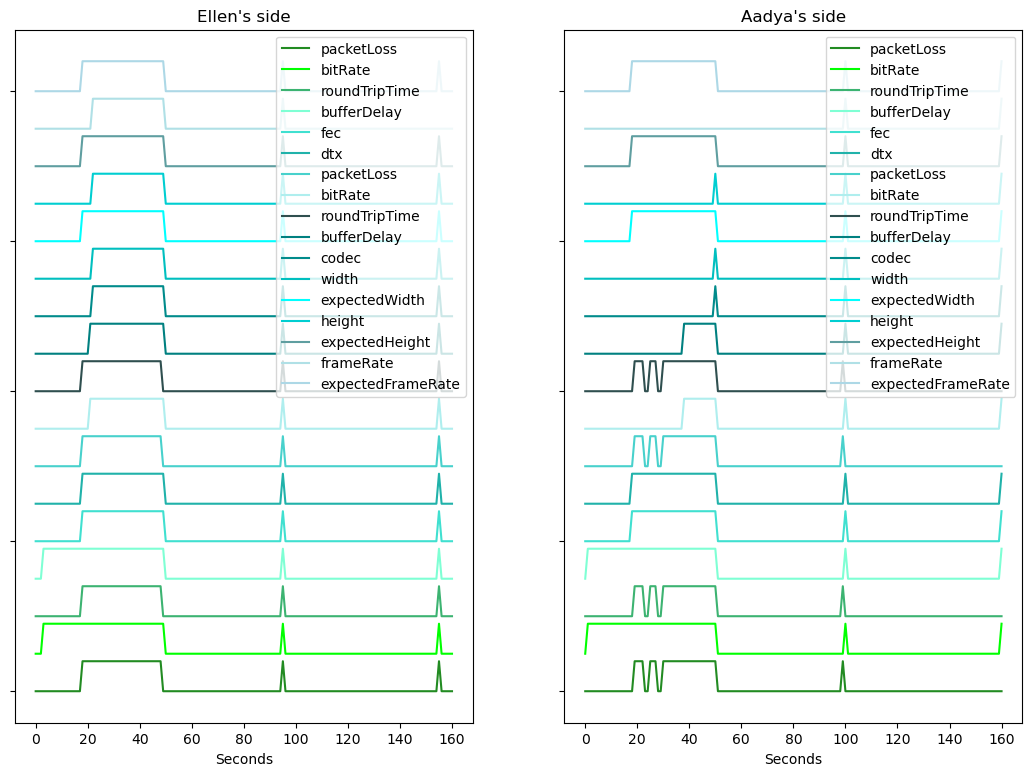

In [15]:
parent_file_path = '../parsed_CSVs/fieldwork/colac/colac2/test'
test_number = 1
audio_ellen, video_ellen, audio_aadya, video_aadya = read_in_relevant_data(parent_file_path, test_number)
print(find_non_null_timestamps(audio_ellen))
graph_crossover(audio_ellen, video_ellen, audio_aadya, video_aadya)

In [21]:
def combine_csv_by_identifier(csv1_path, csv2_path, output_csv_path):
    # Read both CSV files into pandas dataframes
    df1 = pd.read_csv(csv1_path)
    df2 = pd.read_csv(csv2_path)

    # Rename the first column to 'identifier' in both dataframes if not already named
    df1.rename(columns={df1.columns[0]: 'identifier'}, inplace=True)
    df2.rename(columns={df2.columns[0]: 'identifier'}, inplace=True)

    # Merge the two dataframes on the 'identifier' column using an inner join
    merged_df = pd.merge(df1, df2, on='identifier', how='inner')

    # Write the merged dataframe to a new CSV file
    merged_df.to_csv(output_csv_path, index=False)

MOSs_file_path = "fieldwork_MOSs.csv"
subjective_file_path = "../test_combos/fieldwork/fieldwork_subjective.csv"
writeout_file_path = "../Regression/regression_tables/fieldwork/subjective_table.csv"
combine_csv_by_identifier(MOSs_file_path, subjective_file_path, writeout_file_path)